In [1]:
import pyLIMA, os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyLIMA import event, telescopes
from pyLIMA.simulations import simulator
from pyLIMA.models import FSPL_model,USBL_model,PSPL_model
from ipywidgets import interactive, HBox, VBox, Layout
from ipywidgets import (FloatSlider, FloatLogSlider, interactive_output, HBox, VBox, GridBox, Layout, Label)
from IPython.display import display
current_path = os.getcwd()
parent_directory = os.path.abspath(os.path.join(current_path, os.pardir))
print("Parent Directory:", parent_directory)
sys.path.append(parent_directory)
import pyLIMA_plots
from astropy import units as u
from astropy import constants as C
from pyLIMA.xallarap.xallarap import xallarap_shifts, compute_xallarap_curvature


Parent Directory: /home/anibal-pc/Roman_Rubin_NASA


In [2]:
def orbital_period_kepler(a_au, M_tot_Msun):
    """
    Compute the orbital period of a binary system using Kepler's third law
    in astronomical units.

    Parameters
    ----------
    a_au : float or array-like
        Semimajor axis in astronomical units (AU).
    M_tot_Msun : float or array-like
        Total mass of the system in solar masses (M_sun).

    Returns
    -------
    P_yr : float or ndarray
        Orbital period in years.
    """
    a_au = np.asarray(a_au, dtype=float)
    M_tot_Msun = np.asarray(M_tot_Msun, dtype=float)
    print("Period ", np.sqrt(a_au**3 / M_tot_Msun), "years")
    print("converting to ", np.sqrt(a_au**3 / M_tot_Msun)*365.25, "days (to use in pyLIMA)")
    return np.sqrt(a_au**3 / M_tot_Msun)*365.25*(1/u.day)

In [3]:
import numpy as np
import pandas as pd
import astropy.units as u

def build_case(case_name, DS, DL, rEhat, v_perp, a, M1, M2,
               t0=50, u0=0.1, xi_phase=0, xi_inclination=0, flux_ratio=0.1):
    """
    Construye un diccionario con los parámetros de un caso de xallarap.
    """
    q_xi = (M2 / M1).decompose().value
    P = orbital_period_kepler(a, M1 + M2)

    tE = (rEhat * DL / DS) / v_perp

    return {
        "case": case_name,
        "DS_kpc": DS.to(u.kpc).value,
        "DL_kpc": DL.to(u.kpc).value,
        "rEhat_AU": rEhat.to(u.AU).value,
        "v_perp_kms": v_perp.to(u.km/u.s).value,
        "a_AU": a.to(u.AU).value,
        "M1_Msun": M1.to(u.M_sun).value,
        "M2_Msun": M2.to(u.M_sun).value,
        "xi_mass_ratio": q_xi,
        "tE": tE.to(u.day).value,
        "t0": t0,
        "u0": u0,
        "xiE": (a / rEhat).decompose().value,
        "omega_xi_1_per_day": (2*np.pi / P).value,
        "xi_phase": xi_phase,
        "xi_inclination": xi_inclination,
        "flux_ratio": flux_ratio,
        "P": P.value,
    }

DS = 8 * u.kpc
DL = 4 * u.kpc
v_perp = 50 * u.km / u.s
a = 2 * u.AU

rows = []

# =========================
# rEhat = 5 AU
# =========================
rEhat = 5 * u.AU

# Case 1: face-on, P > tE
rows.append(build_case(
    "case1", DS, DL, rEhat, v_perp, a,
    M1=2*u.M_sun, M2=1.4*u.M_sun,
    xi_inclination=0
))

# Case 2: face-on, P < tE
rows.append(build_case(
    "case2", DS, DL, rEhat, v_perp, a,
    M1=1.4*u.M_sun, M2=100*u.M_sun,
    xi_inclination=0
))

# Case 3a: edge-on, low mass ratio
rows.append(build_case(
    "case3a", DS, DL, rEhat, v_perp, a,
    M1=2*u.M_sun, M2=1.4*u.M_sun,
    xi_inclination=np.pi/2
))

# Case 3b: edge-on, high mass ratio
rows.append(build_case(
    "case3b", DS, DL, rEhat, v_perp, a,
    M1=1.4*u.M_sun, M2=100*u.M_sun,
    xi_inclination=np.pi/2
))

# =========================
# rEhat = 2 AU  (Case 4)
# =========================
rEhat = 2 * u.AU

rows.append(build_case(
    "case4-1", DS, DL, rEhat, v_perp, a,
    M1=2*u.M_sun, M2=1.4*u.M_sun,
    xi_inclination=0
))

rows.append(build_case(
    "case4-2", DS, DL, rEhat, v_perp, a,
    M1=1.4*u.M_sun, M2=100*u.M_sun,
    xi_inclination=0
))

rows.append(build_case(
    "case4-3a", DS, DL, rEhat, v_perp, a,
    M1=2*u.M_sun, M2=1.4*u.M_sun,
    xi_inclination=np.pi/2
))

rows.append(build_case(
    "case4-3b", DS, DL, rEhat, v_perp, a,
    M1=1.4*u.M_sun, M2=100*u.M_sun,
    xi_inclination=np.pi/2
))

df_cases = pd.DataFrame(rows).set_index("case")
df_cases

Period  1.5339299776947408 years
converting to  560.2679243530041 days (to use in pyLIMA)
Period  0.2808833628231621 years
converting to  102.59264827115996 days (to use in pyLIMA)
Period  1.5339299776947408 years
converting to  560.2679243530041 days (to use in pyLIMA)
Period  0.2808833628231621 years
converting to  102.59264827115996 days (to use in pyLIMA)
Period  1.5339299776947408 years
converting to  560.2679243530041 days (to use in pyLIMA)
Period  0.2808833628231621 years
converting to  102.59264827115996 days (to use in pyLIMA)
Period  1.5339299776947408 years
converting to  560.2679243530041 days (to use in pyLIMA)
Period  0.2808833628231621 years
converting to  102.59264827115996 days (to use in pyLIMA)


,DS_kpc,DL_kpc,rEhat_AU,v_perp_kms,a_AU,M1_Msun,M2_Msun,xi_mass_ratio,tE,t0,u0,xiE,omega_xi_1_per_day,xi_phase,xi_inclination,flux_ratio,P
case,,,,,,,,,,,,,,,,,
case1,8.0,4.0,5.0,50.0,2.0,2.0,1.4,0.700000,86.572842,50,0.1,0.4,0.011215,0,0.000000,0.1,560.267924
case2,8.0,4.0,5.0,50.0,2.0,1.4,100.0,71.428571,86.572842,50,0.1,0.4,0.061244,0,0.000000,0.1,102.592648
case3a,8.0,4.0,5.0,50.0,2.0,2.0,1.4,0.700000,86.572842,50,0.1,0.4,0.011215,0,1.570796,0.1,560.267924
case3b,8.0,4.0,5.0,50.0,2.0,1.4,100.0,71.428571,86.572842,50,0.1,0.4,0.061244,0,1.570796,0.1,102.592648
case4-1,8.0,4.0,2.0,50.0,2.0,2.0,1.4,0.700000,34.629137,50,0.1,1.0,0.011215,0,0.000000,0.1,560.267924
case4-2,8.0,4.0,2.0,50.0,2.0,1.4,100.0,71.428571,34.629137,50,0.1,1.0,0.061244,0,0.000000,0.1,102.592648
case4-3a,8.0,4.0,2.0,50.0,2.0,2.0,1.4,0.700000,34.629137,50,0.1,1.0,0.011215,0,1.570796,0.1,560.267924
case4-3b,8.0,4.0,2.0,50.0,2.0,1.4,100.0,71.428571,34.629137,50,0.1,1.0,0.061244,0,1.570796,0.1,102.592648


In [4]:
for case_name, row in df_cases.iterrows():
    print(case_name)
    print(row["DS_kpc"])
    
    break

case1
8.0


# Create event, define telescope and choose a model

PyLIMA need that we specify the compontents of $\xi_{E}=(\xi_{E \parallel},\xi_{E \perp}) = $.

Where $\xi_{E \parallel}=\xi_E \cos(\theta)$ and $\xi_{E \perp}=\xi_E \sin(\theta)$.


pyLIMA parameters OrderedDict({'t0': np.float64(50.0), 'u0': np.float64(0.1), 'tE': np.float64(86.57284184027779), 'xi_para': np.float64(0.4), 'xi_perp': np.float64(0.0), 'xi_angular_velocity': np.float64(0.011214608286625353), 'xi_phase': np.float64(0.0), 'xi_inclination': np.float64(0.0), 'xi_mass_ratio': np.float64(0.7), 'q_flux_G': np.float64(0.1), 'fsource_Simulation': 1, 'ftotal_Simulation': 1})
pyLIMA parameters OrderedDict({'t0': np.float64(50.0), 'u0': np.float64(0.1), 'tE': np.float64(86.57284184027779), 'xi_para': np.float64(0.4), 'xi_perp': np.float64(0.0), 'xi_angular_velocity': np.float64(0.06124401127235416), 'xi_phase': np.float64(0.0), 'xi_inclination': np.float64(0.0), 'xi_mass_ratio': np.float64(71.42857142857143), 'q_flux_G': np.float64(0.1), 'fsource_Simulation': 1, 'ftotal_Simulation': 1})
pyLIMA parameters OrderedDict({'t0': np.float64(50.0), 'u0': np.float64(0.1), 'tE': np.float64(86.57284184027779), 'xi_para': np.float64(0.4), 'xi_perp': np.float64(0.0), 'xi_an

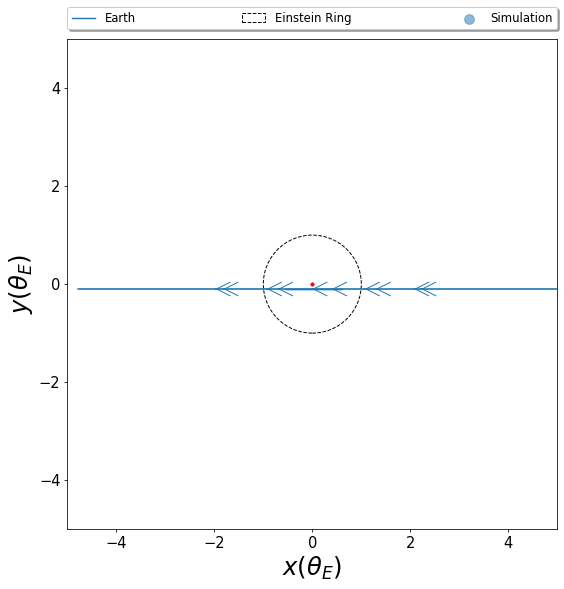

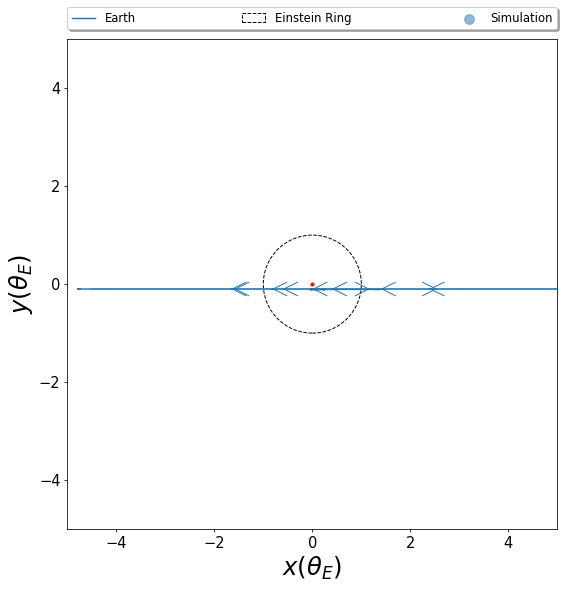

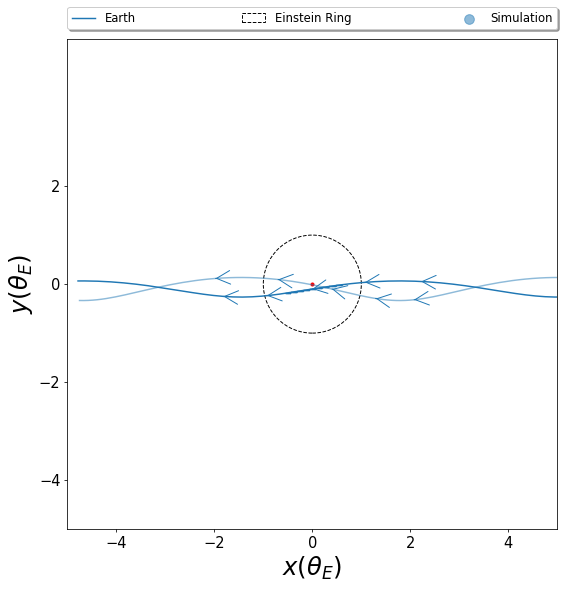

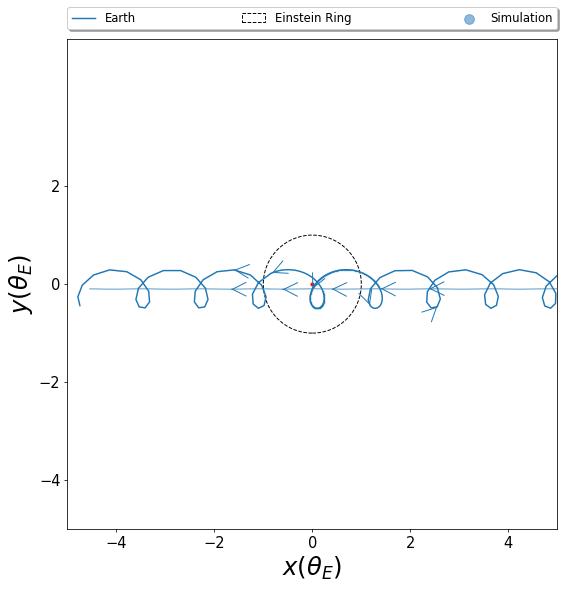

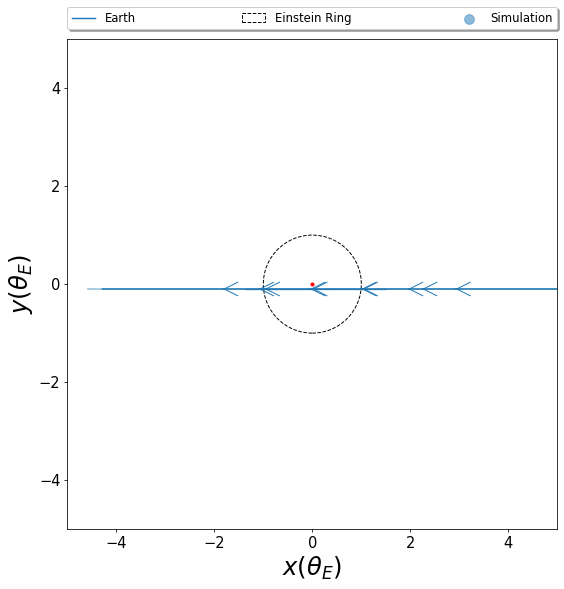

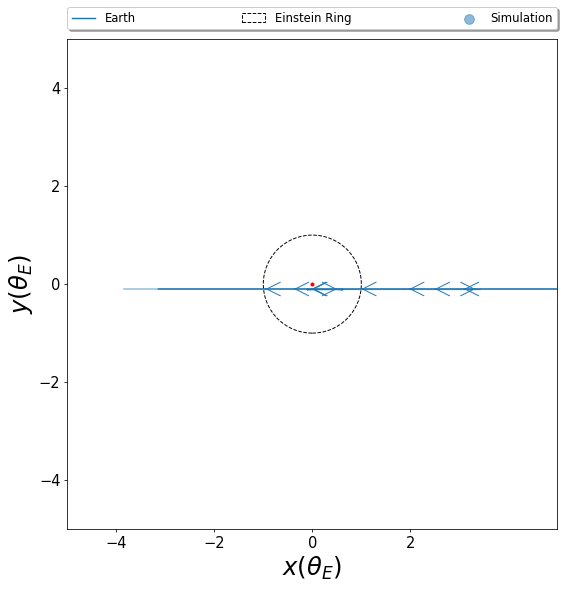

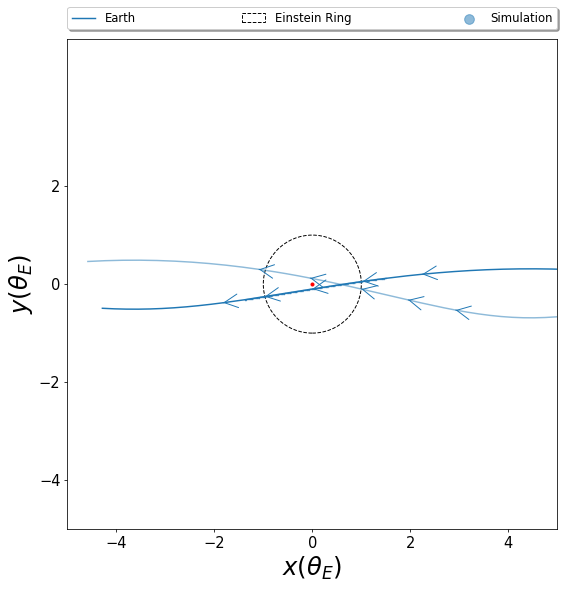

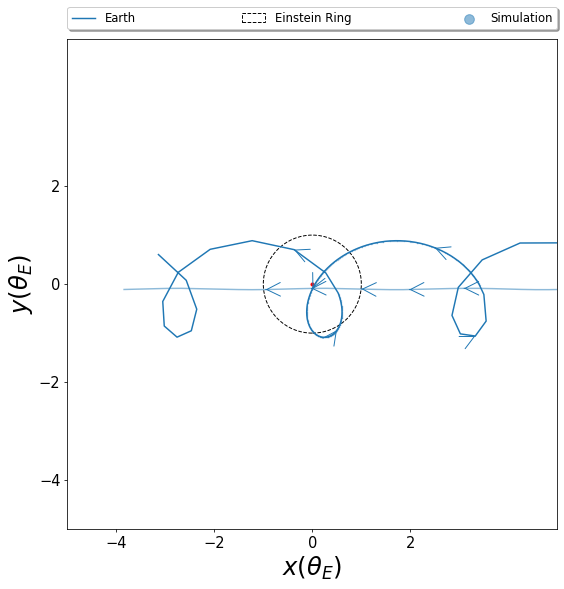

In [5]:
# ---- Event & telescope ----
simulated_event = event.Event()
simulated_event.name = 'Simulated'
simulated_event.ra = 170
simulated_event.dec = -70

time_sim = np.linspace(0, 100, 500)
lightcurve_sim = np.c_[time_sim, np.full_like(time_sim, 19.0), np.full_like(time_sim, 0.01)]

tel = telescopes.Telescope(
    name='Simulation',
    camera_filter='G',
    lightcurve=lightcurve_sim.astype(float),
    lightcurve_names=['time','mag','err_mag'],
    lightcurve_units=['JD','mag','mag'],
    location='Earth'
)
simulated_event.telescopes.append(tel)



for case_name, df_row in df_cases.iterrows():
    params_list = [0]*12
    params_list[0] = df_row['t0'] 
    params_list[1] = df_row['u0'] 
    params_list[2] = df_row['tE'] 
    params_list[3] = df_row['xiE']*np.cos(0) # <---- THE SOURCE BINARY SISTEM MOVES PARALLEL TO THE SEMI MAJOR AXIS
    params_list[4] = df_row['xiE']*np.sin(0) # <---- THE SOURCE BINARY SISTEM MOVES PARALLEL TO THE SEMI MAJOR AXIS
    params_list[5] = 2*np.pi/df_row['P']
    params_list[6] = df_row['xi_phase']   #< ---- Orbital phase at t0
    params_list[7] = df_row['xi_inclination']
    params_list[8] = df_row['xi_mass_ratio']
    params_list[9] = df_row['flux_ratio']
    params_list[10] = 1 # <---- FLUX IS NOT RELEVANT TO A(t) COMPUTATION
    params_list[11] = 1 # <---- FLUX BLENDING IS NOT RELEVANT TO A(t) COMPUTATION
    
    model = PSPL_model.PSPLmodel(simulated_event, parallax=['None', 0], double_source=['Circular', df_row['t0']]) # <--- Here I set t0,xi = t0
    model.define_model_parameters()
    
    # plt.close("all")
    # %matplotlib inline
    py_params = model.compute_pyLIMA_parameters(params_list)
    print("pyLIMA parameters", py_params)
    
    A = model.model_magnification(model.event.telescopes[0], py_params)
    
    # plt.figure(dpi=120)
    # plt.title(case_name)
    # plt.plot(time_sim, A, label="DSPL")
    # plt.xlabel("Time")
    # plt.ylabel(r"$A(t)$")
    # plt.legend()
    # plt.tight_layout()
    # plt.show()
    # pyLIMA_plots.plot_geometry(model,params_list)
    from bokeh.plotting import figure, show
    from bokeh.layouts import row
    
    # Plot Bokeh para A(t)
    p1 = figure(width=600, height=400, title=case_name,
                x_axis_label="Time", y_axis_label="A(t)")
    p1.line(time_sim, A, legend_label="DSPL")
    
    # Plot Bokeh para geometría PyLIMA
    fig_mpl, p2 = pyLIMA_plots.plot_geometry(model, params_list, bokeh_plot=True)
    
    show(row(p1, p2))
